![My Image](./image/customer.jpg)
<!-- ![Alt text](https://img.freepik.com/free-vector/flat-design-credit-assessment-with-diagrams_23-2149163755.jpg?t=st=1729239212~exp=1729242812~hmac=d3fccd372747ada74cd9dfc898aabf4826bb21a6509c22e1c1f5a8885bfa282c&w=740) -->


# **About Dataset**
### **Context**
### Problem Statement

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

### **Content**
### Attributes

#### People

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise
#### Products

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years
#### Promotion

- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
#### Place

- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month
#### Target
- Need to perform clustering to summarize customer segments.

#### Acknowledgement
The dataset for this project is provided by Dr. Omar Romero-Hernandez.

#### Inspiration
happy learning….

Hope you like this dataset please don't forget to like this notebook

---

- **About the author:** Sajjad Ali Shah
- **LinkedIn:** [LinkedIn Profile](https://www.linkedin.com/in/sajjad-ali-shah47/)
- **Dataset link:** [Customer Personality Analysis Dataset](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?select=marketing_campaign.csv)

---

<div style="background-color:#C40C0C; padding:10px; border-radius:8px; text-align:center;">
    <h2 style="color:white; font-weight:bold; margin:0;">
        <span style="font-size:25px;">📚</span> 1. Import Necessary Libraries
    </h2>
</div>


In [1]:
# import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Read the file
df=pd.read_csv("./data/marketing_campaign.csv")
df.head()

,ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse
0,5524\t1957\tGraduation\tSingle\t58138\t0\t0\t0...
1,2174\t1954\tGraduation\tSingle\t46344\t1\t1\t0...
2,4141\t1965\tGraduation\tTogether\t71613\t0\t0\...
3,6182\t1984\tGraduation\tTogether\t26646\t1\t0\...
4,5324\t1981\tPhD\tMarried\t58293\t1\t0\t19-01-2...


In [3]:
# Read the tab-separated CSV file and display the first few rows of the DataFrame
df = pd.read_csv("./data/marketing_campaign.csv", sep="\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


- This specifies that the file uses a tab character (\t) as the separator between columns instead of the default comma (,). This is common in TSV (Tab-Separated Values) files

In [4]:
# Shape of the data
df.shape

(2240, 29)

In [5]:
# Descriptive statistics
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [6]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

<div style="background-color:#C40C0C; padding:10px; border-radius:8px; text-align:center;">
    <h2 style="color:white; font-weight:bold; margin:0;">
        <span style="font-size:25px;">🧹</span> 2. Data Cleaning
    </h2>
</div>


In [7]:
# Check for missing values
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

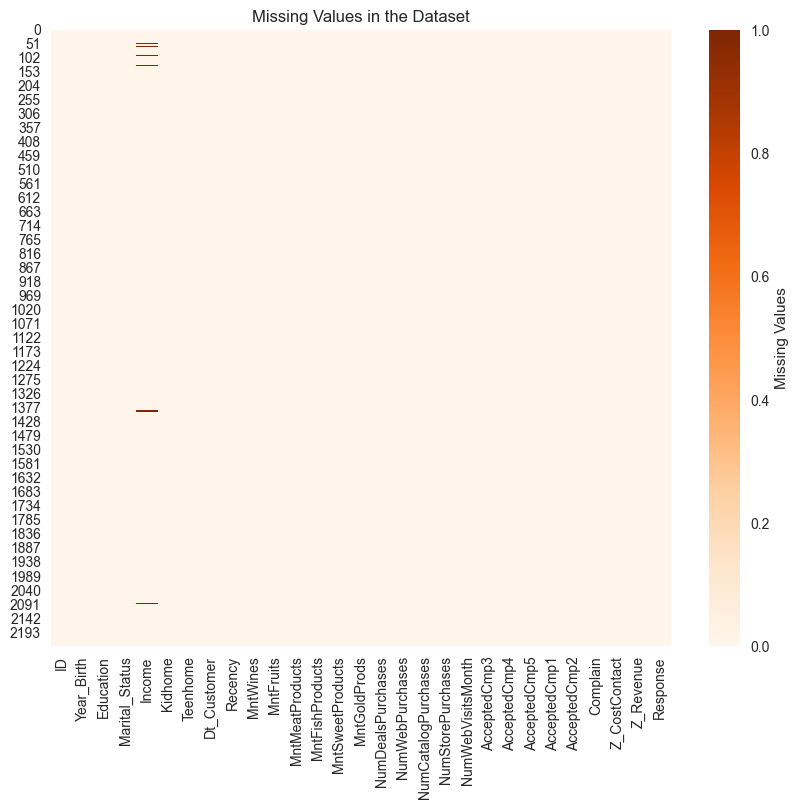

In [8]:
# Visualize the missing values
plt.figure(figsize=(10, 8))
sns.heatmap(df.isnull(), cbar_kws={'label': 'Missing Values'}, cmap='Oranges')
plt.title('Missing Values in the Dataset')
plt.show()


From the above output, we can conclude and note that:

- There are missing values in income

In [9]:
# Drop the null values
df=df.dropna()

In [10]:
print(f"Missing values in data: {df.isnull().sum().sum()}")

Missing values in data: 0


<div style="background-color:#C40C0C; padding:10px; border-radius:8px; text-align:center;">
    <h2 style="color:white; font-weight:bold; margin:0;">
        <span style="font-size:25px;">🔍</span> 3. Explore Data
    </h2>
</div>


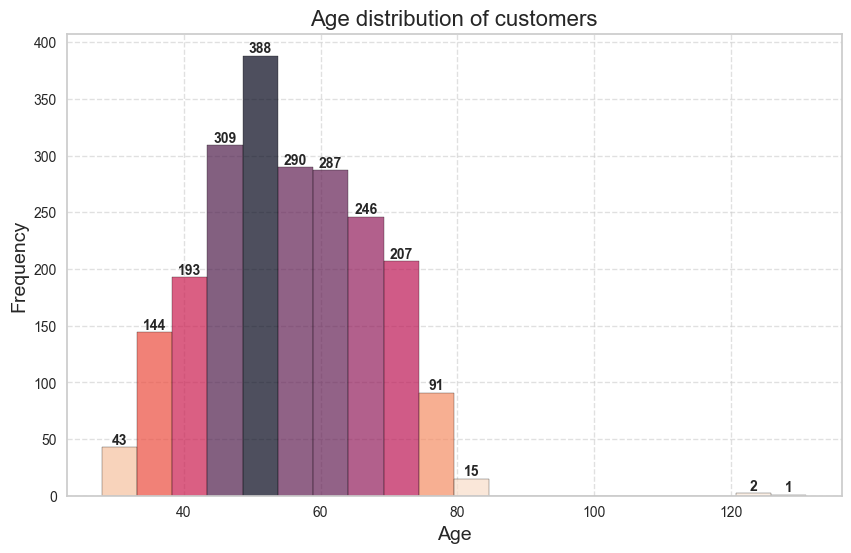

In [12]:
df['Age'] = 2024 - df['Year_Birth']

plt.figure(figsize=(10, 6))

# Normalize color by the bar height
n, bins, patches = plt.hist(df['Age'], bins=20, color='blue', alpha=0.7, edgecolor='black')
for i in range(len(patches)):
    patches[i].set_facecolor(sns.color_palette("rocket_r", as_cmap=True)(n[i] / max(n)))
    if n[i] > 0:
        plt.text(patches[i].get_x() + patches[i].get_width() / 2, n[i], int(n[i]), 
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title('Age distribution of customers', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

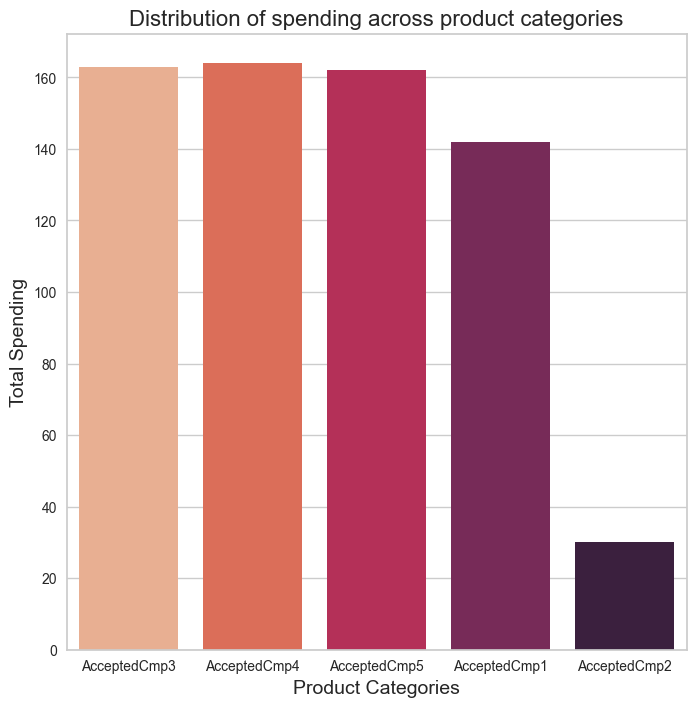

In [13]:
product_columns = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2']
# Sum of each product category
# Sum of each product category
total_spend = df[product_columns].sum()

# Colors and plot size
colors = sns.color_palette("rocket_r", len(product_columns))
plt.figure(figsize=(8, 8))

# Bar plot for spending distribution
sns.barplot(x=product_columns, y=total_spend, palette=colors)

# Labels and title
plt.xlabel('Product Categories', fontsize=14)
plt.ylabel('Total Spending', fontsize=14)
plt.title('Distribution of spending across product categories', fontsize=16)

plt.show()

In [14]:
product_columns = ['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
# Sum of each product category
total_spend = df[product_columns].sum()
# Create a DataFrame for Plotly
data = {
    'Product Category': product_columns,
    'Total Spending': total_spend
}
# Plotly Donut Chart with labels outside
fig = px.pie(data, 
             names='Product Category', 
             values='Total Spending', 
             title='Distribution of Purchases and Web Visits across Product Categories',
             color_discrete_sequence=px.colors.sequential.Reds)
# Adjust to make it a donut chart and set labels outside
fig.update_traces(hole=0.4, textinfo='percent', textposition='outside', textfont_size=14)
# Update title
fig.update_layout(title_font_size=16)

fig.show()

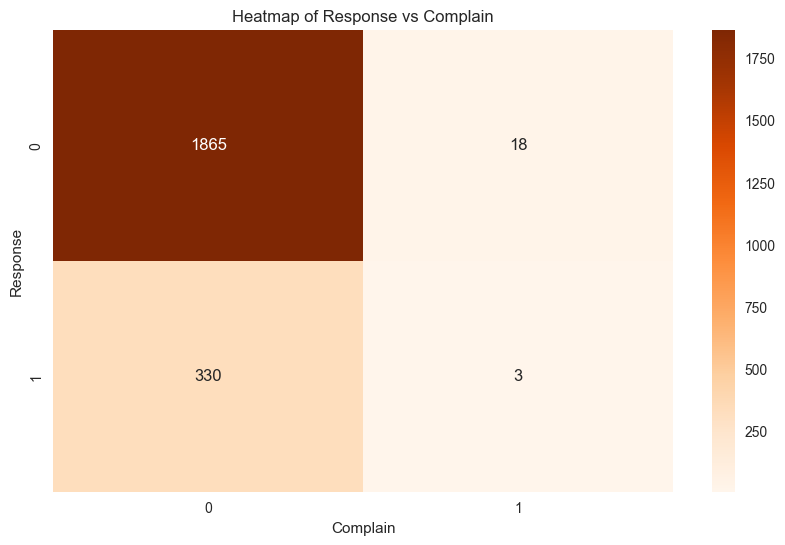

In [15]:
# Create a contingency table
contingency_table = pd.crosstab(df['Response'], df['Complain'])

plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Oranges', cbar=True)
plt.title('Heatmap of Response vs Complain')
plt.xlabel('Complain')
plt.ylabel('Response')
plt.show()

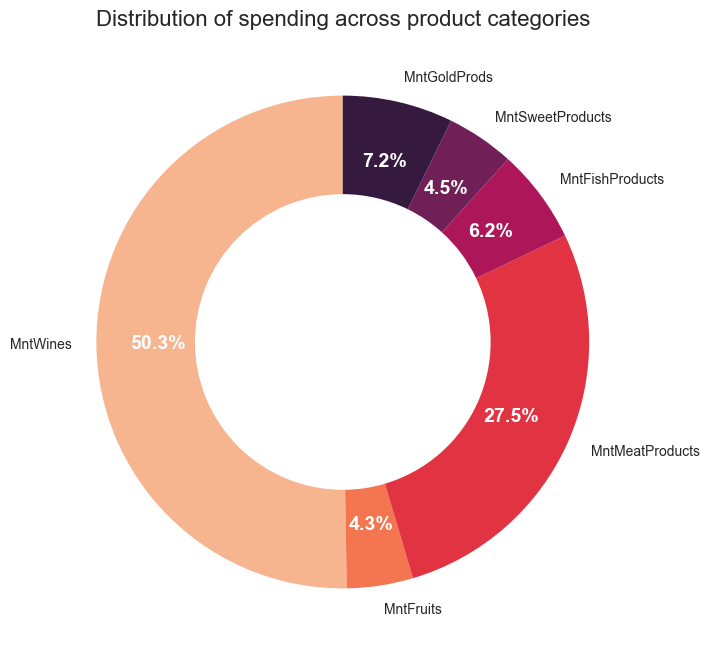

In [16]:
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
total_spend = df[product_columns].sum()


colors = sns.color_palette("rocket_r", len(product_columns))
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(total_spend, labels=product_columns, autopct='%1.1f%%', 
                                   startangle=90, colors=colors, wedgeprops=dict(width=0.4), pctdistance=0.75)
for autotext in autotexts:
    autotext.set_color('white')  # white for better contrast
    autotext.set_fontsize(14)    
    autotext.set_weight('bold')  

# Add title
plt.title('Distribution of spending across product categories', fontsize=16)

plt.show()

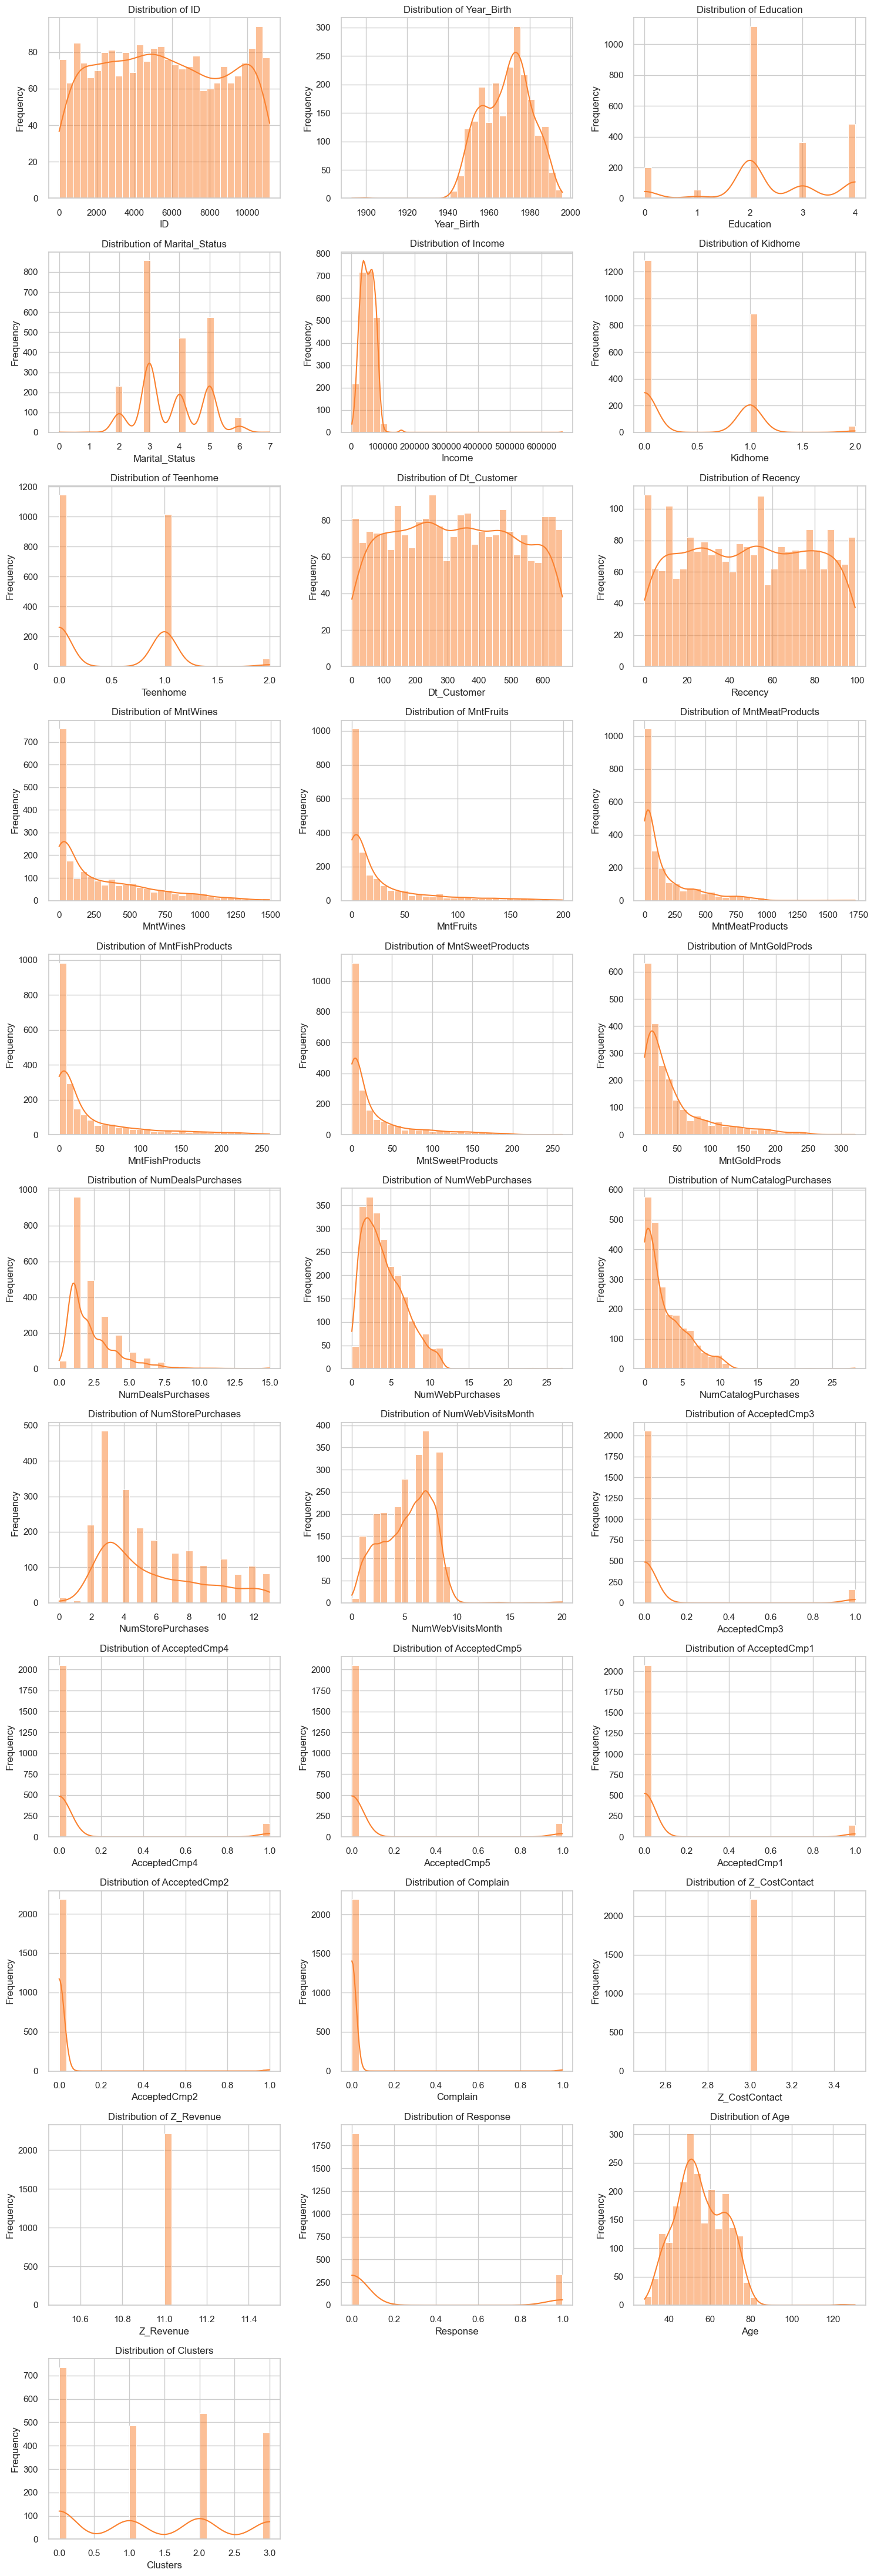

In [42]:
# Set the aesthetic style of the plots
sns.set(style='whitegrid')

# Define the color to be used for all plots
plot_color = '#FA812F'

# Create a figure with subplots
num_cols = len(df.columns)
cols_per_row = 3  # Adjust this for the number of plots per row
num_rows = (num_cols // cols_per_row) + (num_cols % cols_per_row > 0)

fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(15, num_rows * 4))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Iterate through the columns and create a distplot for each
for i, column in enumerate(df.columns):
    sns.histplot(df[column], kde=True, ax=axes[i], color=plot_color, bins=30)
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Remove empty subplots if the number of columns is not a perfect multiple of cols_per_row
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


<div style="background-color:#C40C0C; padding:10px; border-radius:8px; text-align:center;">
    <h2 style="color:white; font-weight:bold; margin:0;">
        <span style="font-size:25px;">⚙️</span> 4. DATA PREPROCESSING
    </h2>
</div>


In [18]:
# list of categorical columns
cat_df = list(df.select_dtypes(include=["object"]).columns)

# print the list of categorical columns
print(cat_df)

['Education', 'Marital_Status', 'Dt_Customer']


In [19]:
# label encoding for the categorical columns
LE = LabelEncoder()
# encoding the categorical columns
for col in df:
    if df[col].dtype == 'object':
        df[col] = LE.fit_transform(df[col])

In [20]:
#Creating a copy of data
ds = df.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [21]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue,Age
0,-0.019809,-0.986443,-0.350527,0.254218,0.234063,-0.823039,-0.928972,-1.307032,0.310532,0.978226,...,1.484827,0.850031,0.351713,1.428553,2.504712,-0.554143,0.693232,0.0,0.0,0.986443
1,-1.051009,-1.236801,-0.350527,0.254218,-0.234559,1.039938,0.909066,-0.901325,-0.380509,-0.872024,...,-0.633880,-0.732867,-0.168231,-1.125881,-0.571082,-1.169518,-0.131574,0.0,0.0,1.236801
2,-0.445526,-0.318822,-0.350527,1.182303,0.769478,-0.823039,-0.928972,0.610855,-0.795134,0.358511,...,-0.146821,-0.037937,-0.688176,1.428553,-0.229327,1.291982,-0.543978,0.0,0.0,0.318822
3,0.182737,1.266777,-0.350527,1.182303,-1.017239,1.039938,-0.928972,-0.680031,-0.795134,-0.872024,...,-0.585174,-0.752171,-0.168231,-0.760962,-0.912837,-0.554143,0.280829,0.0,0.0,-1.266777
4,-0.081373,1.016420,1.429011,-0.673866,0.240221,1.039938,-0.928972,0.326333,1.554407,-0.391671,...,-0.000703,-0.559135,1.391603,0.333796,0.112428,0.061232,-0.131574,0.0,0.0,-1.016420


<div style="background-color:#C40C0C; padding:10px; border-radius:8px; text-align:center;">
    <h2 style="color:white; font-weight:bold; margin:0;">
        <span style="font-size:25px;">⬇️</span> 5. DIMENSIONALITY REDUCTION
    </h2>
</div>


In [22]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2216.0,-9.298619e-17,2.475359,-5.055279,-2.320316,-0.544663,2.175333,6.597622
col2,2216.0,-3.206420e-17,1.577710,-6.480131,-1.190687,-0.059094,1.235932,3.965850
col3,2216.0,-6.412841e-18,1.258921,-5.548546,-0.834187,-0.087894,0.710170,5.415882


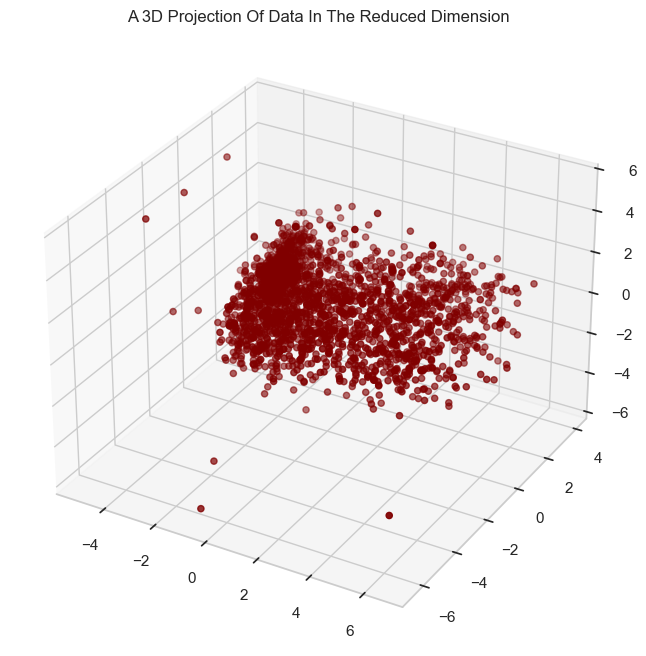

In [23]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

<div style="background-color:#C40C0C; padding:10px; border-radius:8px; text-align:center;">
    <h2 style="color:white; font-weight:bold; margin:0;">
        <span style="font-size:25px;">🧩</span> 6. CLUSTERING
    </h2>
</div>


Elbow Method to determine the number of clusters to be formed:


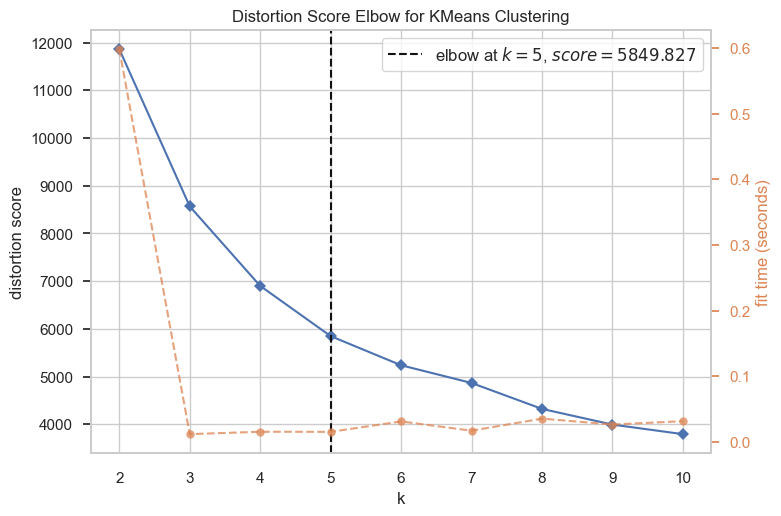

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [24]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [25]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= yhat_AC

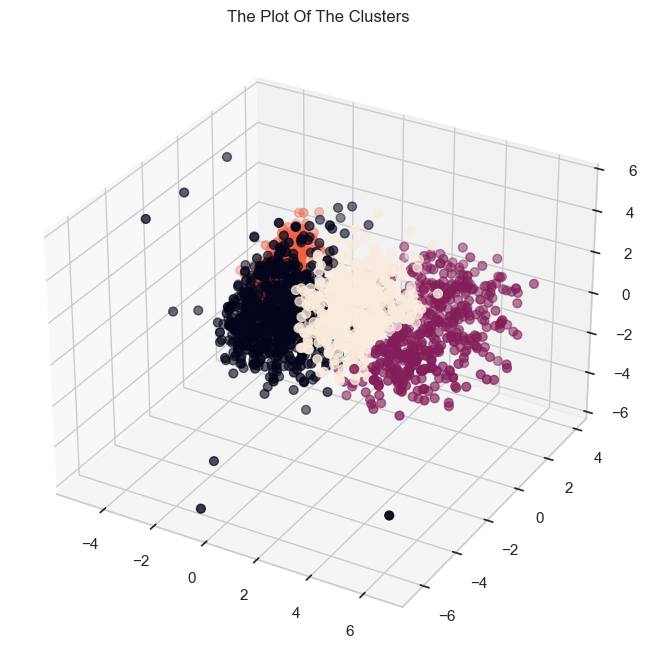

In [26]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o' )
ax.set_title("The Plot Of The Clusters")
plt.show()

<div style="background-color:#C40C0C; padding:10px; border-radius:8px; text-align:center;">
    <h2 style="color:white; font-weight:bold; margin:0;">
        <span style="font-size:25px;">📊</span> 7. EVALUATING MODELS
    </h2>
</div>


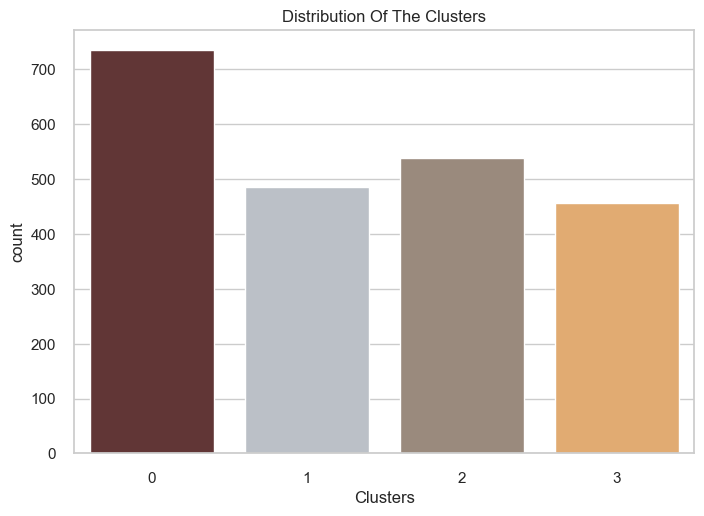

In [27]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=df["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

<Axes: >

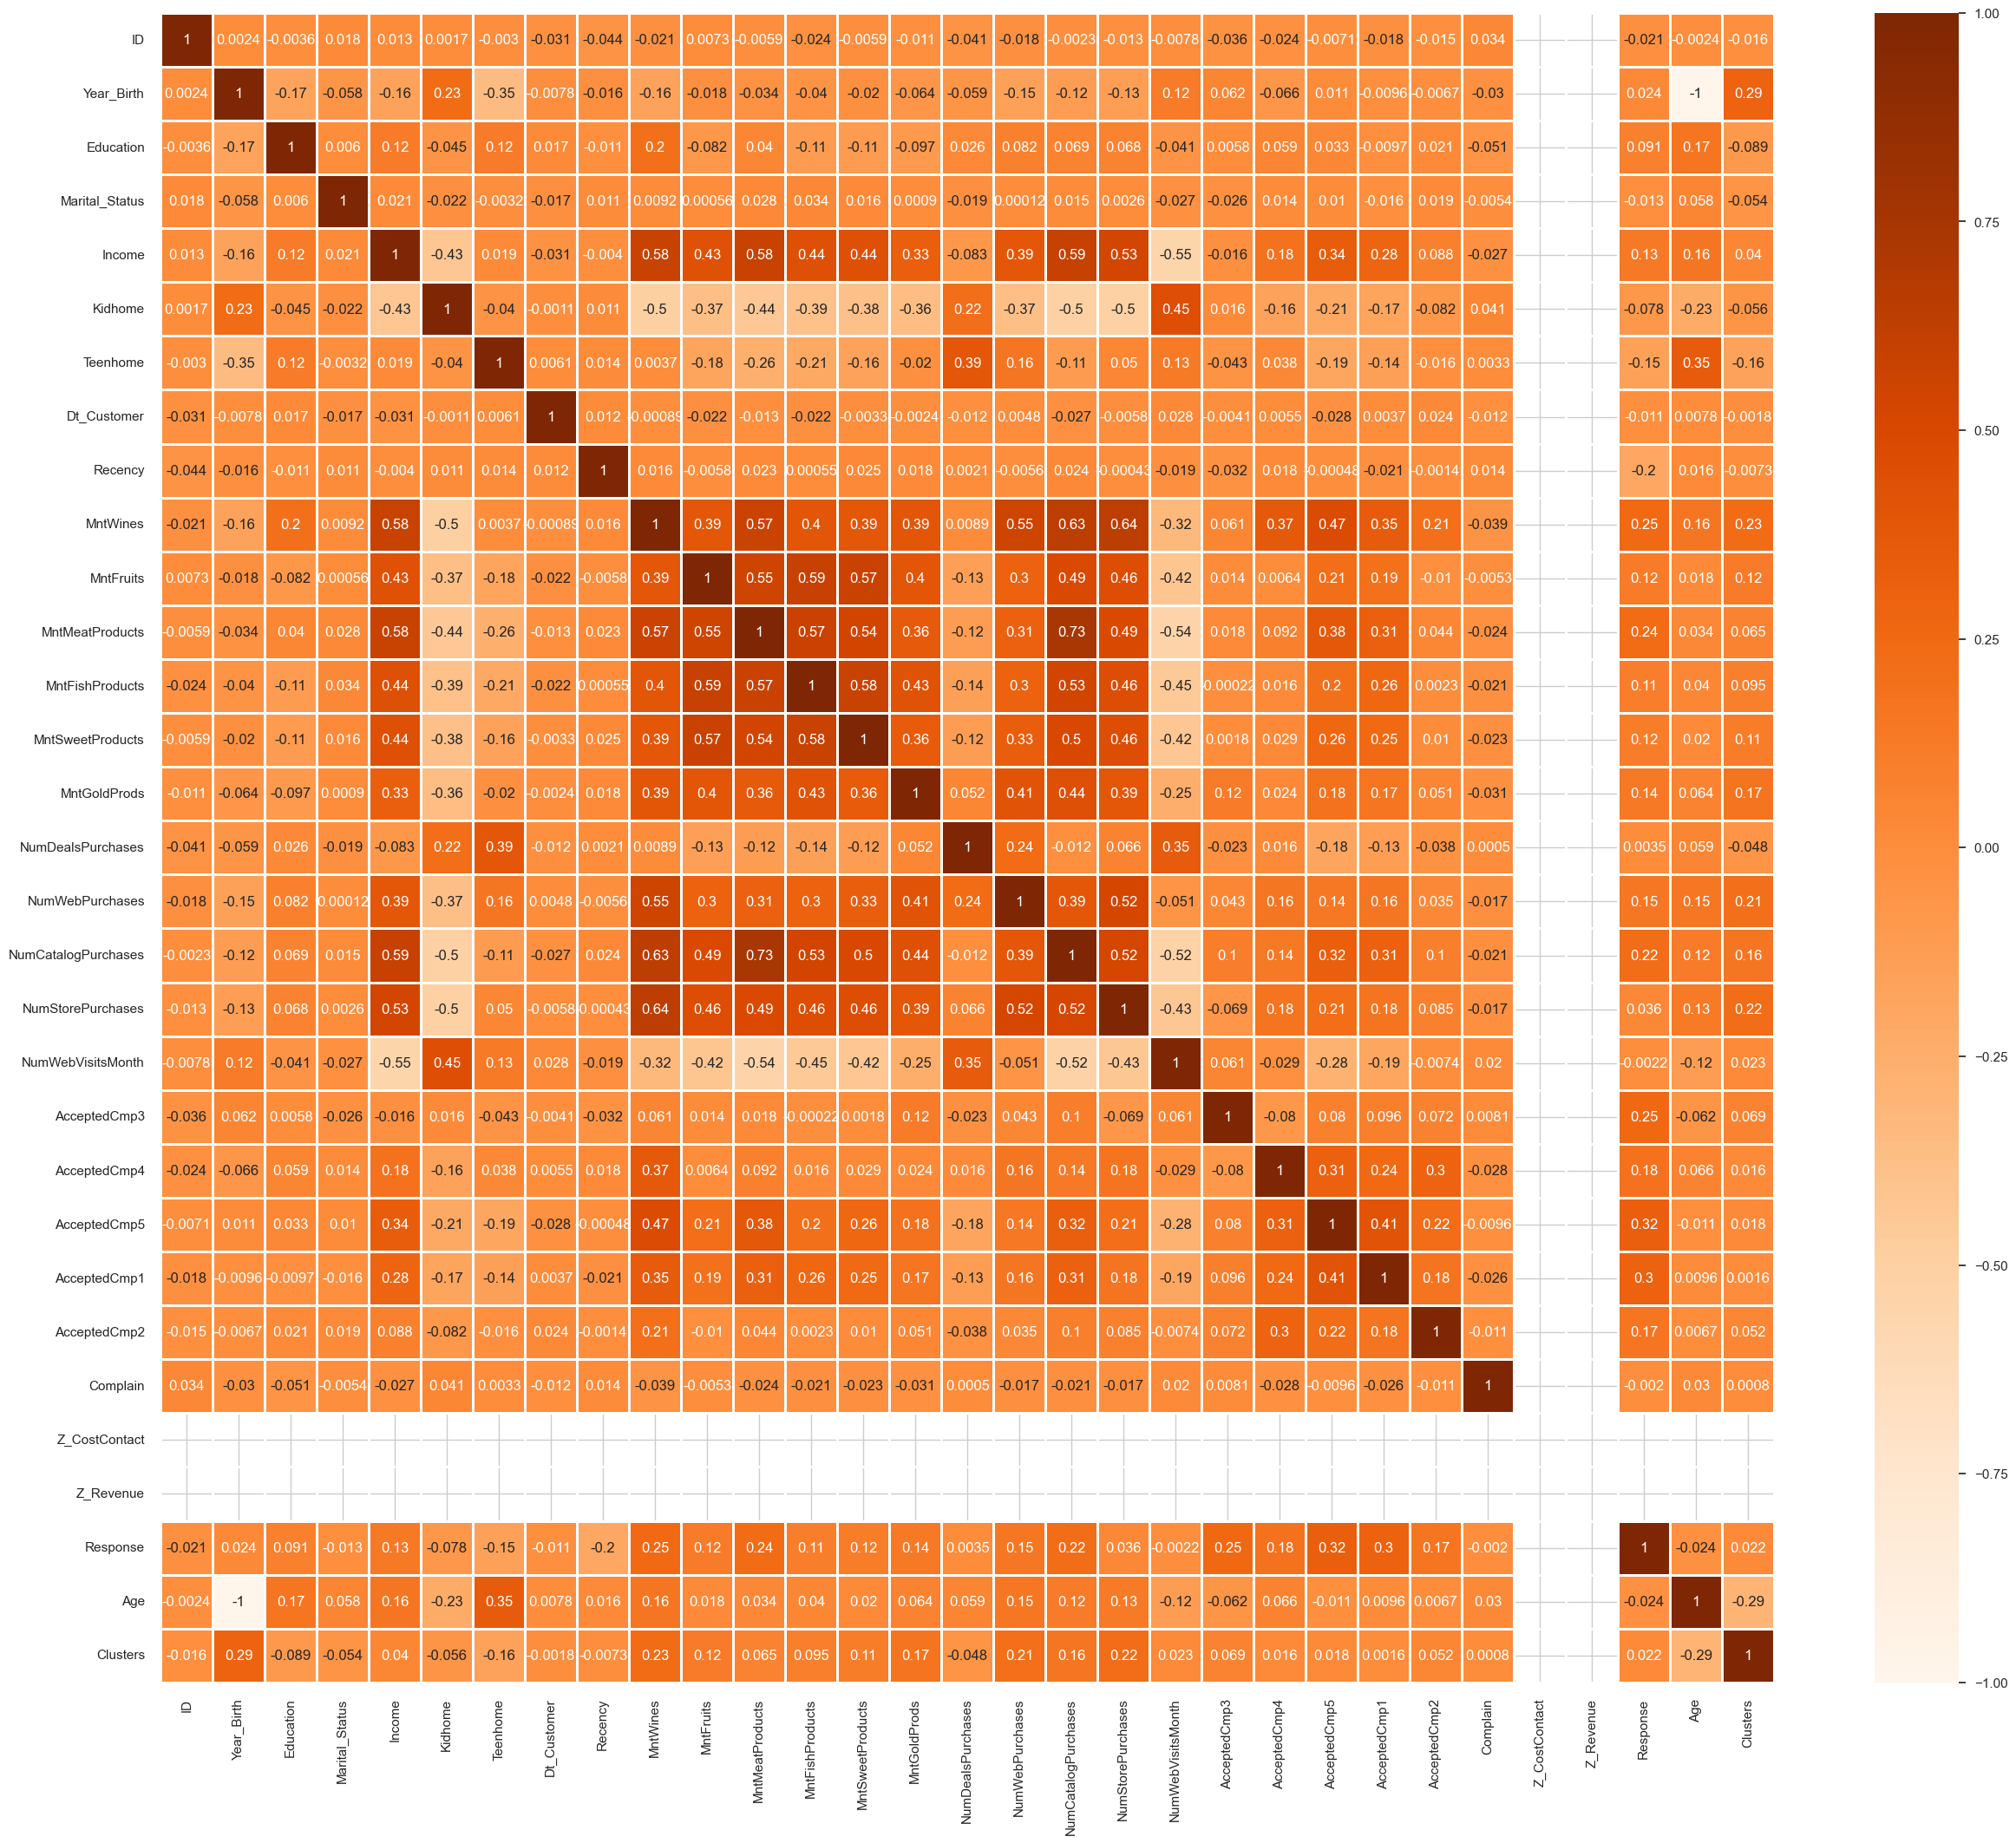

In [39]:
# Plotting the correlation matrix
plt.figure(figsize=(30,25))
sns.heatmap(df.corr(), annot=True,cmap = 'Oranges',linewidths=1)

<div style="background-color:#C40C0C; padding:10px; border-radius:8px; text-align:center;">
    <h2 style="color:white; font-weight:bold; margin:0;">
        <span style="font-size:25px;">📝</span> 8. CONCLUSION
    </h2>
</div>


<div style="background-color:#C40C0C; padding:10px; border-radius:8px; text-align:center;">
    <h2 style="color:white; font-weight:bold; margin:0;">
        <span style="font-size:25px;">✅</span> 9. END
    </h2>
</div>
